In [1]:
import gym
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import numpy as np

# Часть первая, с блекджеком и стратегиями

In [25]:
env = gym.make('Blackjack-v1', natural=True)
num_episodes = 1000000
reward = 0

In [26]:
%%time
def simplest_strategy(state):
    if state[0] >= 19: 
        return 0
    return 1
    
    
for i in tqdm(range(num_episodes)):
    state = env.reset()
    is_done = False
    while not is_done:
        action = simplest_strategy(state)
        state, rwrd, is_done, _ = env.step(action)
    reward += rwrd
    
print(f"Выигрыш от  простой стратегии: {reward/num_episodes}")

100%|█████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:42<00:00, 23370.76it/s]

Выигрыш от  простой стратегии: -0.197436
Wall time: 42.8 s


In [26]:
import random

class Agent():
    def __init__(self, env, epsilon=None, alpha=None, gamma=None, num_hands_to_train=None):
        self.env = env
        self.valid_actions = [0,1]
        self.Q = dict()           
        self.epsilon = epsilon or 1.0   
        self.alpha = alpha or 0.5      
        self.gamma = gamma or 0.9
        self.num_hands_to_train = num_hands_to_train or 10000
        self.small_decrement = (0.1 * self.epsilon) / (0.3 * self.num_hands_to_train) 
        self.big_decrement = (0.8 * self.epsilon) / (0.4 * self.num_hands_to_train) 
        self.num_hands_to_train_left = num_hands_to_train or 10000

    def update_parameters(self):
        if self.num_hands_to_train_left > 0.7 * self.num_hands_to_train:
            self.epsilon -= self.small_decrement
        elif self.num_hands_to_train_left > 0.3 * self.num_hands_to_train:
            self.epsilon -= self.big_decrement
        elif self.num_hands_to_train_left > 0:
            self.epsilon -= self.small_decrement
        else:
            self.epsilon = 0.0
            self.alpha = 0.0
        self.num_hands_to_train_left -= 1

    def get_maxQ(self, observation):
        if observation not in self.Q:
            self.Q[observation] = dict((action, 0.0) for action in self.valid_actions)
        return max(self.Q[observation].values())

    def choose_action(self, observation):
        if observation not in self.Q:
            self.Q[observation] = dict((action, 0.0) for action in self.valid_actions)
        if random.random() > self.epsilon:
            maxQ = self.get_maxQ(observation)
            action = random.choice([k for k in self.Q[observation].keys()
                                    if self.Q[observation][k] == maxQ])
        else:
            action = random.choice(self.valid_actions)

        self.update_parameters()
        return action

    
    def learn(self, num_samples, num_hands):
        average_rewards = []
        observation = self.env.reset()
        for sample in tqdm(range(num_samples)):
            rnd = 1
            total_reward = 0
            while rnd <= num_hands:
                action = agent.choose_action(observation)
                next_observation, reward, is_done, _ = self.env.step(action)
                self.Q[observation][action] += self.alpha * (reward
                                                     + (self.gamma * self.get_maxQ(next_observation))
                                                     - self.Q[observation][action])
                total_reward += reward
                observation = next_observation
                if is_done:
                    observation = self.env.reset() 
                    rnd += 1
            average_rewards.append(total_reward/rnd)
        self.plot_running_average(average_rewards,num_samples)
        return average_rewards, sum(average_rewards) / num_samples
    
    
    def plot_running_average(self, rewards, num_samples):
        N = len(rewards)
        running_avg = np.empty(N)
        for t in range(N):
            running_avg[t] = np.mean(rewards[max(0, t-100):(t+1)])
        plt.figure(figsize=(20,15))
        plt.plot(running_avg)
        plt.title("Running Average")
        plt.xlabel('num_samples')
        plt.ylabel(f'payout after {num_samples} rounds')
        plt.show()
    

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [08:27<00:00, 197.06it/s]


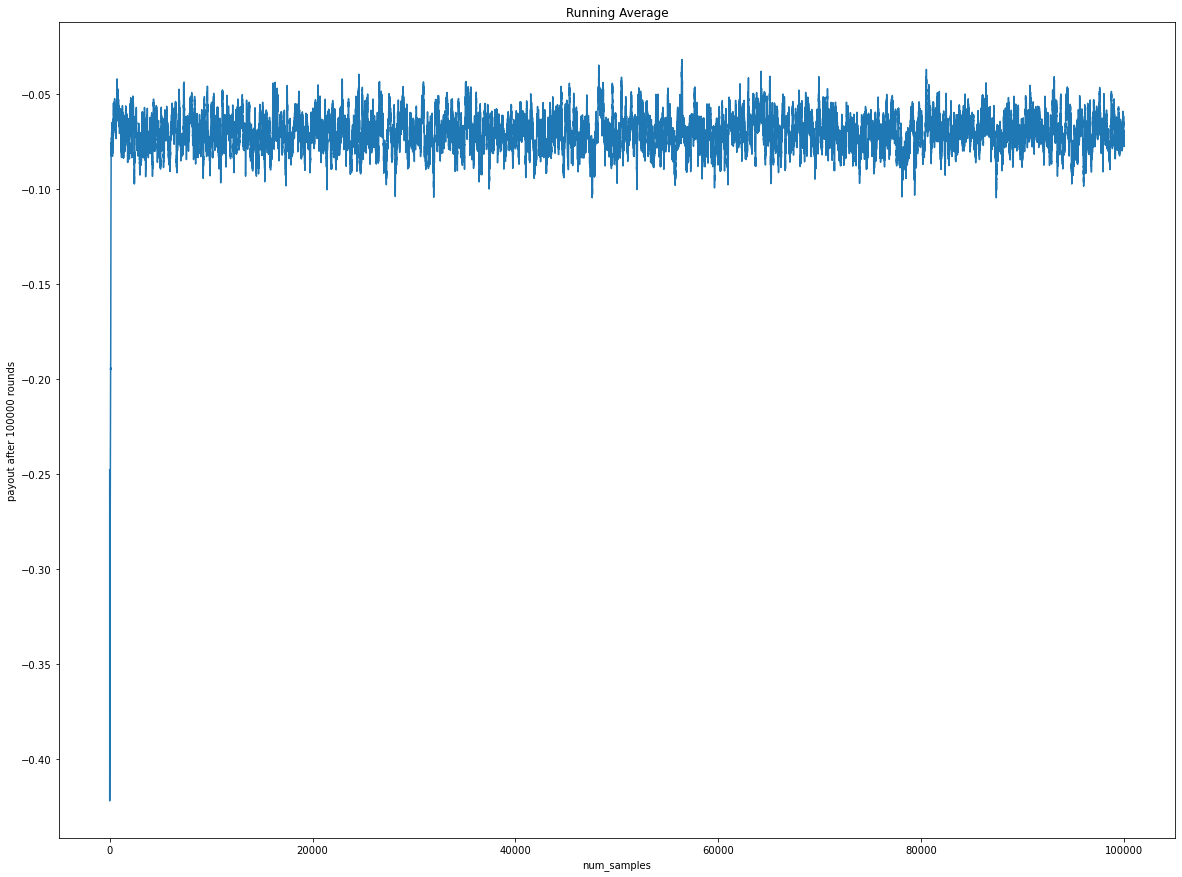

In [27]:
agent = Agent(env=gym.make('Blackjack-v1', natural=True),
              epsilon=1.0,
              alpha=0.01,
              gamma=0.01,
             )
avgrl, avgr =  agent.learn(100000,100)

In [28]:
print(f"Средний выигрыш: {avgr}")

Средний выигрыш: -0.07015643564356004


In [20]:
class Agent():
    def __init__(self, env, epsilon=None, alpha=None, gamma=None, num_hands_to_train=None):
        self.env = env
        self.valid_actions = [0,1,2]
        self.Q = dict()           
        self.epsilon = epsilon or 1.0   
        self.alpha = alpha or 0.5      
        self.gamma = gamma or 0.9
        self.num_hands_to_train = num_hands_to_train or 10000
        self.small_decrement = (0.1 * self.epsilon) / (0.3 * self.num_hands_to_train) 
        self.big_decrement = (0.8 * self.epsilon) / (0.4 * self.num_hands_to_train) 
        self.num_hands_to_train_left = num_hands_to_train or 10000

    def update_parameters(self):
        if self.num_hands_to_train_left > 0.7 * self.num_hands_to_train:
            self.epsilon -= self.small_decrement
        elif self.num_hands_to_train_left > 0.3 * self.num_hands_to_train:
            self.epsilon -= self.big_decrement
        elif self.num_hands_to_train_left > 0:
            self.epsilon -= self.small_decrement
        else:
            self.epsilon = 0.0
            self.alpha = 0.0
        self.num_hands_to_train_left -= 1

    def get_maxQ(self, observation):
        if observation not in self.Q:
            self.Q[observation] = dict((action, 0.0) for action in self.valid_actions)
        return max(self.Q[observation].values())

    def choose_action(self, observation):
        if observation not in self.Q:
            self.Q[observation] = dict((action, 0.0) for action in self.valid_actions)
        if random.random() > self.epsilon:
            maxQ = self.get_maxQ(observation)
            action = random.choice([k for k in self.Q[observation].keys()
                                    if self.Q[observation][k] == maxQ])
        else:
            action = random.choice(self.valid_actions)

        self.update_parameters()
        return action

    
    def learn(self, num_samples, num_hands):
        average_rewards = []
        observation = self.env.reset()
        for sample in tqdm(range(num_samples)):
            rnd = 1
            total_reward = 0
            while rnd <= num_hands:
                action = agent.choose_action(observation)
                next_observation, reward, is_done, _ = self.env.step(action)
                self.Q[observation][action] += self.alpha * (reward
                                                     + (self.gamma * self.get_maxQ(next_observation))
                                                     - self.Q[observation][action])
                total_reward += reward
                observation = next_observation
                if is_done:
                    observation = self.env.reset() 
                    rnd += 1
            average_rewards.append(total_reward/rnd)
        self.plot_running_average(average_rewards,num_samples)
        return average_rewards, sum(average_rewards) / num_samples
    
    
    def plot_running_average(self, rewards, num_samples):
        N = len(rewards)
        running_avg = np.empty(N)
        for t in range(N):
            running_avg[t] = np.mean(rewards[max(0, t-100):(t+1)])
        plt.figure(figsize=(20,15))
        plt.plot(running_avg)
        plt.title("Running Average")
        plt.xlabel('num_samples')
        plt.ylabel(f'payout after {num_samples} rounds')
        plt.show()
    

In [21]:
class Doubled_Blackjack_Env:
    def __init__(self):
        self.base_env = gym.make('Blackjack-v1')
        
    def reset(self):
        return self.base_env.reset()
    
    def step(self, action):
        if action == 2:
            state, reward, is_done, _ = self.base_env.step(1)
            return state, 2*reward, True, _       
        else:
            return self.base_env.step(action)

In [22]:
agent = Agent(env=Doubled_Blackjack_Env(),
              epsilon=1.0,
              alpha=0.01,
              gamma=0.01,
             )

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [07:56<00:00, 209.82it/s]


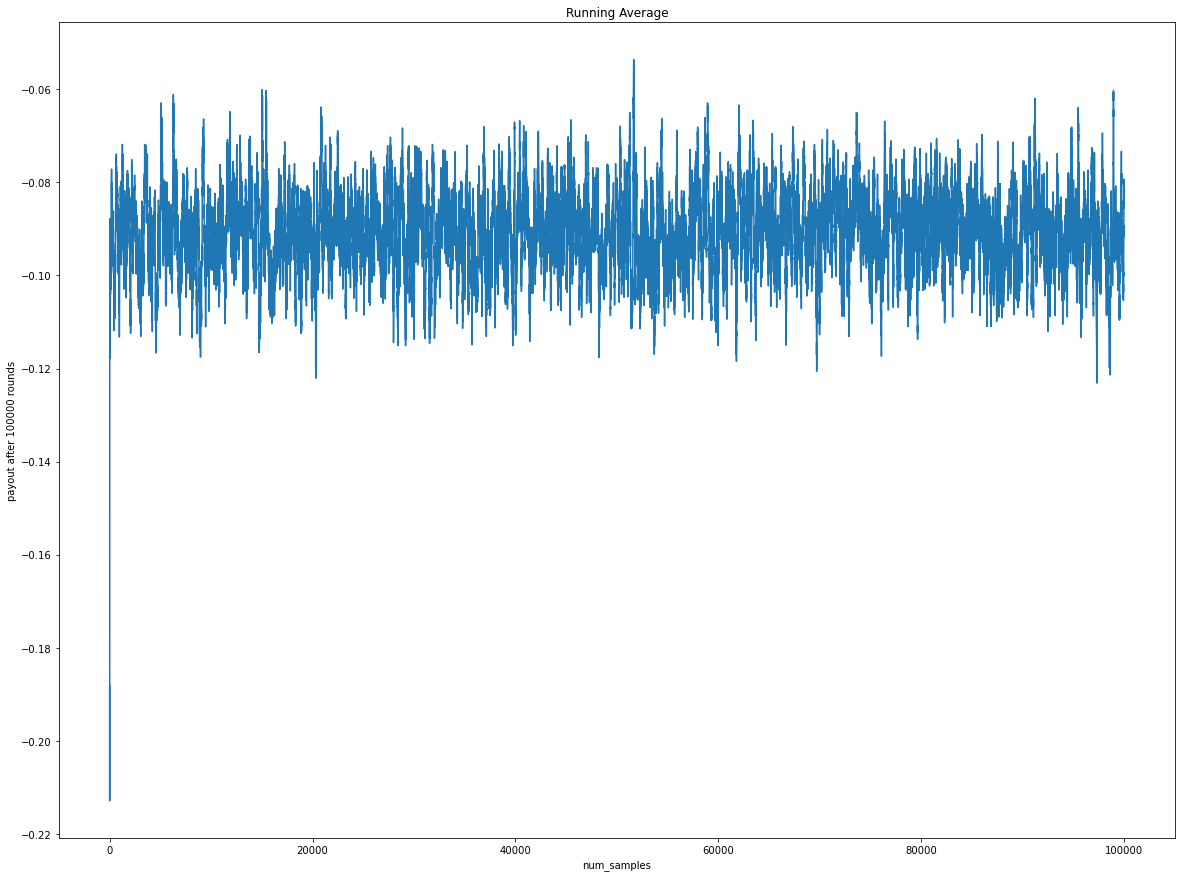

In [24]:
avgrl, avgr =  agent.learn(100000,100)

In [25]:
print(f"Средний выигрыш: {avgr}")

Средний выигрыш: -0.09081722772276371
